In [1]:
import pandas as pd
dataset = pd.read_csv("C:\\Users\\AJAY\\Desktop\\DataScience\\DataScience-Python3\\mammographic_masses.data.txt")
dataset.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [2]:
dataset = pd.read_csv("C:\\Users\\AJAY\\Desktop\\DataScience\\DataScience-Python3\\mammographic_masses.data.txt",na_values = ['?'],
                      names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
dataset.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [3]:
dataset.isnull().sum()

BI-RADS      2
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

In [4]:
dataset.dtypes

BI-RADS     float64
age         float64
shape       float64
margin      float64
density     float64
severity      int64
dtype: object

In [5]:
dataset.dropna(inplace=True)

In [6]:
dataset.isnull().sum()

BI-RADS     0
age         0
shape       0
margin      0
density     0
severity    0
dtype: int64

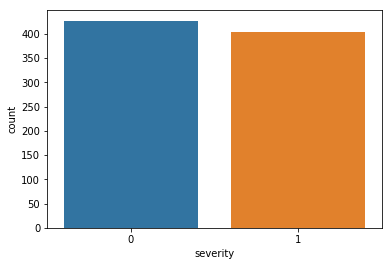

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

sns.countplot(x = "severity", data = dataset)

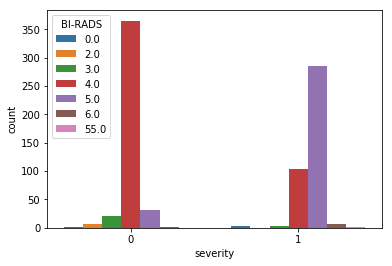

In [8]:
sns.countplot(x = "severity",hue = "BI-RADS",data = dataset)

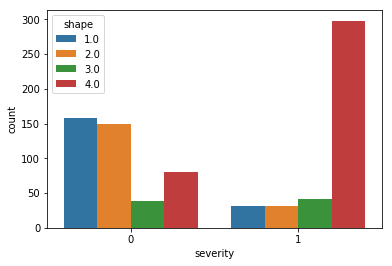

In [9]:
sns.countplot(x = "severity", hue = "shape",data = dataset)

In [10]:
dataset['severity'].value_counts()

0    427
1    403
Name: severity, dtype: int64

In [11]:
dataset.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
10,5.0,76.0,1.0,4.0,3.0,1


In [12]:
all_features = dataset[['age', 'shape',
                             'margin', 'density']].values


all_classes = dataset['severity'].values

feature_names = ['age', 'shape', 'margin', 'density']

all_features

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [13]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

In [14]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_features_scaled, all_classes, train_size=0.75, random_state=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 1)
# Train the classifier on training set
clf.fit(training_inputs,training_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [16]:
clf.score(testing_inputs, testing_classes)

0.7355769230769231

In [17]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7373556945552244

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7540496480696304

# SVM

In [20]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7964988875362076

# KNN

In [21]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)

cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7964988875362076

In [22]:
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
    print (n, cv_scores.mean())

1 0.7239123742356184
2 0.6889838098036746
3 0.7541080699103032
4 0.7300813008130081
5 0.7735464506108056
6 0.7626163189342738
7 0.7940595133145824
8 0.7747082406280172
9 0.7880200243482641
10 0.7854795488574507
11 0.7915333809104012
12 0.7794257168045002
13 0.7819084701174035
14 0.7915039950743742
15 0.7878748443250353
16 0.7794411093852764
17 0.7818073688482151
18 0.775681121699341
19 0.7805147418944068
20 0.7828666582707136
21 0.7853927906748946
22 0.7817342540895289
23 0.7805588206484475
24 0.780587506821712
25 0.7878171221471251
26 0.7866269957880302
27 0.7854365195975539
28 0.7902271105327232
29 0.7865979597833844
30 0.7878314652337574
31 0.7914172368918182
32 0.7878314652337574
33 0.7865976099520032
34 0.7866119530386354
35 0.7866262961252677
36 0.7854358199347914
37 0.7866843681345592
38 0.7866553321299133
39 0.7878891874116676
40 0.7854791990260694
41 0.7854645061080558
42 0.7818500482767305
43 0.7830692106404713
44 0.783054867553839
45 0.783054867553839
46 0.7854648559394373
4

#  NAIVE BAYES

In [23]:
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
all_features_minmax = scaler.fit_transform(all_features)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, all_features_minmax, all_classes, cv=10)

cv_scores.mean()

0.7844055665169388

# Revisiting SVM

In [24]:
C = 1.0
svc = svm.SVC(kernel='rbf', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.8012023704574396

In [25]:
C = 1.0
svc = svm.SVC(kernel='sigmoid', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.7351055791108685

In [26]:
C = 1.0
svc = svm.SVC(kernel='poly', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.792753942599667

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.8073583532737221